# Fit with error analysis

<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_8868\429064733.py:5: SyntaxWarning: invalid escape sequence '\h'
  data = np.loadtxt('..\hello_nexus\example_spectrum.txt')


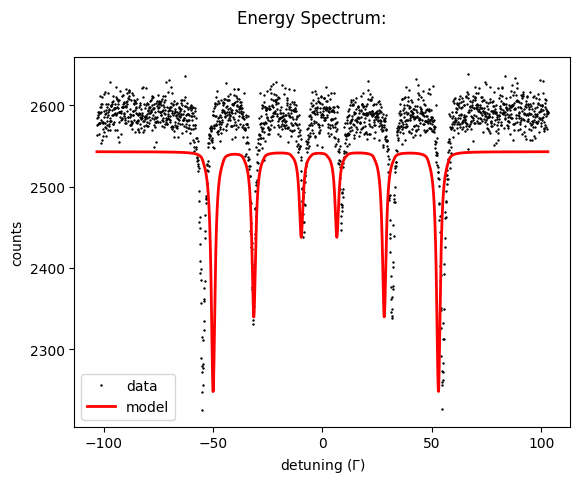

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('..\hello_nexus\example_spectrum.txt')

velocity_experiment = data[:,0]
intensity_experiment = data[:,1]

site = nx.Hyperfine(magnetic_field = nx.Var(value = 31, min = 25, max = 35, fit = True, id = "magnetic field"),
                    magnetic_theta = nx.Var(value = 0, min = -15, max = 15, fit = True, id = "magnetic theta"),
                    quadrupole = nx.Var(value = 0.3, min = 0, max = 2, fit = True, id = "quadrupole"),
                    isotropic = True)

mat_Fe = nx.Material.Template(nx.lib.material.Fe)

mat_Fe.hyperfine_sites = [site]

layer_Fe = nx.Layer(id = "Fe",
                    material = mat_Fe,
                    thickness = nx.Var(value = 2900, min = 0, max = 5000, fit = True, id = "thickness"))

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam()

beam.Unpolarized()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

spectrum = nx.MoessbauerSpectrum(experiment = exp,
                                 velocity = velocity_experiment,
                                 intensity_data = intensity_experiment,
                                 scaling = "auto")

# calculate the intensity from the assumed model
intensity = spectrum.Calculate()

spectrum.Plot()


Run Fit instance with id:  

Starting fit with 1 measurement data set(s) and 6 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                   ES scaling |             2638.74 |                0 |           263874
    1 |                    ES backgr |             257.138 |                0 |          25713.8
    2 |                    thickness |                2900 |                0 |             5000
    3 |               magnetic field |                  31 |               25 |               35
    4 |               magnetic theta |                   0 |              -15 |               15
    5 |                   quadrupole |                 0.3 |                0 |                2

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling ceres solver with fit method LevMar

Ceres Solver Report: Iterations: 44, Initial cost: 5.188211e+02, Final cost: 3.247247e+01, 

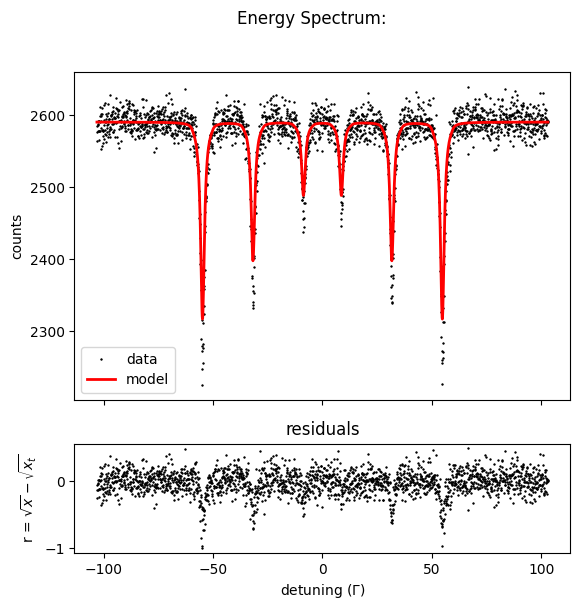

In [2]:
fit = nx.Fit(measurements = [spectrum])

fit.options.file_output = False

fit.Evaluate()

spectrum.Plot()

In [3]:
inverseHessian = fit.inverse_hessian

covariance_matrix = fit.covariance_matrix

correlation_matrix = fit.correlation_matrix

errors = np.array(fit.fit_parameter_errors)

In [4]:
print(correlation_matrix)

print(errors)

[[ 1.00000000e+00 -9.99860670e-01 -9.98350734e-01 -3.07861225e-04
              nan -1.71305302e-04]
 [-9.99860670e-01  1.00000000e+00  9.99166906e-01  3.11283913e-04
              nan  1.68425153e-04]
 [-9.98350734e-01  9.99166906e-01  1.00000000e+00  3.19409004e-04
              nan  1.61287656e-04]
 [-3.07861225e-04  3.11283913e-04  3.19409004e-04  1.00000000e+00
              nan  2.21537831e-04]
 [            nan             nan             nan             nan
              nan             nan]
 [-1.71305302e-04  1.68425153e-04  1.61287656e-04  2.21537831e-04
              nan  1.00000000e+00]]
[[2.84377442e+02]
 [3.08362357e+02]
 [1.32681916e+03]
 [9.50919595e-03]
 [0.00000000e+00]
 [2.59623390e-03]]
